<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/seminar_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Least squares regression derivation with MLE

In the lecture we assumed that in order to find the best line we should minimize sum of least squares $SS(fit)$.
Can we derive it?

Suppose that $x$ are not random variables and only $y$ is. This property is called **weak exogeneity**.
In other words In other words weak exogeneity means that the predictor variables are assumed to be error-free—that is, not contaminated with measurement errors. 

Let's assume **linearity** of $y$ with respect to $x$:
$$
y=a+bx+\epsilon \\
\epsilon \sim \mathcal{N}(0,\,\sigma^{2})
$$

it means that

$$
p(\epsilon)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{\epsilon^2}{2\sigma^2}}
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/normal.png)

Note that $\sigma$ is constant for all $x$. This is the property of **constant variance** (a.k.a. homoscedasticity).
Suppose also that errors $\epsilon$ are **independent** random variables (iid).
$$
\begin{aligned}
L(a,b|\mathbf{y})&=P(\mathbf{y}|a,b)=\prod_i P(y_i|a,b)=\prod_i p(y_i-a-bx|a,b)=\prod_i \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i-a-bx)^2}{2\sigma^2}}=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{\sum_i (y_i-a-bx)^2}{2 \sigma^2}}.
\end{aligned}
$$

Now we calculate log-likelihood function 

$$
l(a,b|\mathbf{y})=\log{L(a,b|\mathbf{y})}=... 
$$

And calculate $a$ and $b$ that minimize it

$$
\text{argmax}_{a,b} \, l(a,b|\mathbf{y}) = \text{argmin}_{a,b} \, E(a,b) = \cdots 
$$

Continue calculation to show that MLE lead to minimization of $SS(a,b)$.

By this example we have learned that Least Squares regression is aplicable under following assumptions:
* weak exogeneity
* linearity
* constant variance
* independence
* lack of perfect multicollinearity (in multivariate regression independent variables should not have a linear relation between each other)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.stats

np.random.seed(0)
minX = -20
maxX = 20

@widgets.interact(sigY=(0.0, 20.0), muY=(-10.0,10.0), sample_size=(2,2000), k=(0.0,10.0), b=(-20.0, 20.0))
def plot_corr(sigY, muY, sample_size, k, b):
  rndD = scipy.stats.norm.rvs(muY, sigY, size=sample_size)
  x = np.random.uniform(low=minX, high=maxX, size=sample_size)
  y = k * x + b + rndD

  plt.figure(figsize=(6, 6))
  plt.title("Random data with correlation coefficient %f" % np.corrcoef(x, y)[0,1]);

  plt.scatter(x, y)

  x_ = np.linspace(minX, maxX, num=200)
  y_ = k*x_ + b
  plt.plot(x_, y_, c='r')

  plt.show()

interactive(children=(FloatSlider(value=10.0, description='sigY', max=20.0), FloatSlider(value=0.0, descriptio…

#Least absolute deviations (LAD) method

Suppose as before

$$
y=a+bx+\epsilon 
$$

but $\epsilon$ has Laplace distribution instead of Normal distribution

$$
\epsilon \sim \text{Laplace}(0, \alpha)
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/lapl.png)

Laplace distribution has pdf

$$
p_{Laplace}(\epsilon; \mu, \alpha)=\frac{\alpha}{2}e^{-\alpha |\epsilon-\mu|}
$$

We calculate likelihood function

$$
\begin{aligned}
L(a,b|\mathbf{y})&=P(\mathbf{y}|a,b)=\prod_i P(y_i|a,b)=\prod_i p(y_i-a-bx|a,b)=\prod_i \frac{\alpha}{2} e^{-|y_i-a-bx_i|/\alpha}=\\
&=\frac{\alpha}{2}e^{-\frac{\sum_i |y_i-a-bx_i|}{\alpha}}.
\end{aligned}
$$
$$
\begin{aligned}
l(a,b|\mathbf{y})&=\log{L(a,b|\mathbf{y})}=... \\
\text{argmax}_{a,b} \, l(a,b|\mathbf{y}) &= \text{argmin}_{a,b} \, E(a,b) \\
\end{aligned}
$$

where
$$
E(a,b) =\cdots .
$$



##Solution

$$
E(a,b)=E_1(a,b)=\sum_i |y_i-a-bx_i|.
$$

This is called $LAD$ (**L**east **A**bsolute **D**eviation) function that we want to minimize.
Unlike $OLS$ the $LAD$ method is robust as it's resistant to outliers in the data and that's why it finds applications in many areas. $LAD$ gives equal emphasis to all observations, in contrast to $OLS$ which, by squaring the residuals, gives more weight to large residuals. This may be helpful in studies where outliers do not need to be given greater weight than other observations. If it is important to give greater weight to outliers, the method of least squares is a better choice.

Unfortunately, finding $LAD$ solution numerically is not stable as $E_{1}(a,b)$ is not convex. Moreover there may be multiple minima and not one as in $OLS$.

#Ridge regression derivation with MAP

Suppose that as in the first example
$$
y=a+bx+\epsilon \\
\epsilon \sim \mathcal{N}(0,\,\sigma^{2})
$$

but now we are in the Bayesian setup and we have an additional prior (an intuition) that

$$
b \sim \mathcal{N}(0,\,\tau^{2})
$$

where $\tau$ is fixed. 

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/prior_norm.png)

$$
P(b)=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{b^2}{2\tau^2}}
$$

Now we have to maximize

$$
L(a,b|\mathbf{y})=P(\mathbf{y}|a,b)P(b)=\left(\prod_i \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i-a-bx)^2}{2\sigma^2}}\right)\frac{1}{\sqrt{2 \pi \tau^2}}e^{-\frac{b^2}{2\tau^2}}
$$

Now logaritmic likelihood function reads as

$$
l(a,b|\mathbf{y})=\log{L(a,b|\mathbf{y})}=N\log{\frac{1}{\sqrt{2 \pi \tau^2}}}-\cdots-\frac{b^2}{2\tau^2}
$$

Minimization of $l(a,b|\mathbf{y})$ is equivalent to maximization of another function $E_{\text{Ridge}}$ where

$$
E_{\text{Ridge}} = \cdots
$$

#Lasso regression derivation with MAP

Suppose now Laplace prior for $b$

$$
P(b; \alpha)=\frac{\alpha}{2}e^{-\alpha |b|}
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/prior_lapl.png)

Show that MAP leads to lasso regression.

We have to maximize

$$
L(a,b|\mathbf{y})=P(\mathbf{y}|a,b)P(b)=\left(\prod_i \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i-a-bx)^2}{2\sigma^2}}\right)\frac{\alpha}{2}e^{-\alpha |b|}
$$

Logaritmic likelihood function

$$
l(a,b|\mathbf{y})=\log{L(a,b|\mathbf{y})}=N\log{\frac{1}{\sqrt{2 \pi \tau^2}}}-\cdots-\alpha |b|
$$

Minimization of $l(a,b|\mathbf{y})$ is equivalent to maximization of another function $E_{\text{Lasso}}$ where

$$
E_{\text{Lasso}} = \cdots
$$

This approach was described also Tibshirani (1996) who noticed that robust Lasso regression in Bayesian setting is equivalent to using Laplace prior. Such prior for coefficients are centered around zero (with centered variables) and has wide tails - so most regression coefficients estimated using it end up being exactly zero. This is clear if you look closely at the picture below, Laplace distribution has a peak around zero (there is a greater distribution mass), while Normal distribution is more diffuse around zero, so non-zero values have greater probability mass.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_6/42XfA.png)

#Regression line and the center of mass

Show that the regression line always passes through the center of mass (aka point of averages) of the point cloud - the point  $(\langle {x} \rangle,\langle {y} \rangle)$.

#Simple linear regression

Here are the heights in inches of $1078$ fathers and their full-grown sons, in England, circa 1900.
This is data from the famous historical study of Karl Pearson on the heritability of height ([On the laws of inheritance in man](https://sci-hub.tw/http://dx.doi.org/10.1093/biomet/2.4.357)).

BTW, $1\, \text{inch}  = 2.54 \, \text{cm}.$

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

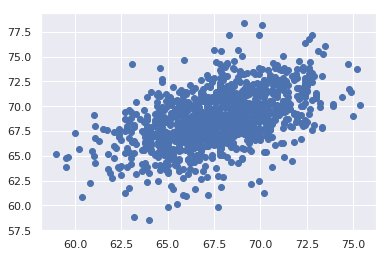

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression

fathers=np.array([65., 63.3, 65., 65.8, 61.1, 63., 65.4, 64.7, 66.1, 67., 59., 62.9, 63.7, 64.1, 64.7, 65.2, 66.4, 65.6, 67.4, 66.8, 67.8, 69.5, 62.5, 63.8, 64.5, 65., 64.7, 65.7, 65.5, 65.6, 66.9, 66.6, 66.5, 67.9, 68.3, 67.7, 68.5, 69.4, 71.8, 62.4, 64.5, 64.5, 63.9, 65.4, 65., 65.7, 68.7, 66.5, 64.9, 69.6, 64.8, 65.3, 65.8, 65.8, 65.6, 65.9, 65.8, 67.1, 66.6, 67.4, 67.3, 66.6, 68.2, 67.8, 68.3, 68.1, 69., 68.9, 69.6, 70.4, 70., 72.8, 62.8, 62.9, 63.9, 64.5, 64.5, 66., 65.8, 66., 65.5, 65.7, 66.8, 66.7, 67., 66.9, 66.8, 67.1, 67.7, 68.3, 67.6, 68.4, 67.7, 68.7, 69.3, 68.7, 69.1, 69.3, 68.6, 69.6, 70.4, 71.2, 70.8, 71.7, 73.3, 63., 63.7, 65.4, 64.6, 66.4, 65.8, 65.7, 66.1, 66.5, 66.6, 66.6, 67.7, 68.5, 67.8, 67.6, 68.1, 69.2, 68.7, 68.6, 68.6, 68.6, 70.4, 70., 70.1, 70.2, 71.3, 70.9, 72.2, 75., 64.9, 65.6, 65.7, 65.9, 65.9, 67.4, 67.5, 67.6, 68.5, 68.5, 68.1, 69.5, 69.1, 69.4, 69.4, 69.5, 70.2, 69.9, 70.4, 70.9, 71.3, 72.1, 72.2, 75.4, 64.5, 66.4, 65.6, 66.8, 66.9, 68.2, 67.5, 67.8, 69., 69.3, 68.7, 69.7, 70.3, 70., 70.2, 70.9, 71.2, 72.4, 73., 74.8, 67.4, 67.3, 67.8, 69.3, 68.7, 70., 69.8, 70.7, 71.1, 72.5, 72.5, 67.5, 68.2, 68.8, 69.9, 71.5, 70.8, 71.9, 63.1, 68.2, 70.1, 70.8, 72.6, 67.9, 67.5, 72.8, 62.7, 68.2, 65.1, 73.4, 62.9, 62.5, 69.9, 71.1, 71.1, 69.5, 70.2, 65.5, 62., 63.6, 65.6, 68., 61.8, 63.8, 64.9, 65.8, 66.4, 68.8, 61.8, 64.3, 63.7, 65., 65.3, 64.8, 65.7, 66., 67., 67.8, 69., 62.2, 62.8, 63.9, 65.4, 64.6, 65.6, 66.2, 66., 65.8, 67.4, 67.1, 67.3, 67.9, 68.3, 68., 68.7, 71.2, 62.4, 62.9, 64.1, 63.9, 64.8, 65.4, 64.8, 68.7, 65.2, 64.3, 66.1, 69., 64.5, 66.1, 65.7, 66.5, 65.6, 66.4, 67.3, 66.8, 66.7, 67.3, 67.4, 67.9, 67.8, 68.1, 68.3, 68.8, 69.4, 69.3, 70.5, 70.1, 70.6, 62.4, 63.2, 63.5, 63.9, 64.6, 64.9, 65.9, 66.2, 66.5, 65.5, 66.9, 67.1, 66.8, 67.2, 66.5, 67., 66.6, 68.2, 67.6, 68.3, 68., 69., 69.3, 68.9, 68.9, 69.4, 69.5, 70.3, 69.9, 70.7, 70.6, 72.4, 72.5, 62.7, 63.9, 64.5, 64.8, 65.4, 65.8, 66.3, 65.8, 66.8, 67.2, 67.3, 67.5, 67.9, 68.4, 67.6, 68.5, 68.6, 69.1, 68.6, 69.2, 68.6, 68.5, 69.7, 70.4, 70., 70.3, 71.3, 71.3, 72.6, 64.4, 64.9, 66.3, 66., 65.7, 66.7, 66.6, 68.3, 67.9, 68., 68.3, 68.8, 69.1, 69., 69.4, 69.8, 69.6, 70.5, 69.9, 71., 71.2, 71.5, 71.6, 73.2, 63.9, 66., 66., 67.5, 66.7, 68.3, 67.7, 68.3, 68.4, 69.1, 69.1, 69.7, 70., 69.6, 70., 70.9, 70.6, 72.3, 71.5, 73., 66.2, 67.3, 67.8, 69.1, 69.4, 69.6, 70.1, 70.2, 71.3, 72.1, 72.3, 67.1, 67.9, 69.1, 69.6, 69.7, 70.5, 72.4, 72.8, 68.1, 68.6, 71.3, 72.1, 74.7, 71.2, 68.3, 60.4, 63.9, 63.1, 64., 73.9, 72., 61., 65.4, 72., 71.3, 65.2, 68.9, 64.5, 64., 66.5, 67.1, 62.3, 63.8, 65.4, 65.6, 66.2, 67.6, 60.2, 63., 63.6, 65.2, 65.1, 64.8, 66.2, 66.2, 66.6, 68., 69., 62.1, 63.2, 64.5, 63.8, 64.6, 64.6, 66.1, 66., 65.7, 67.1, 67.3, 67.2, 68.4, 67.6, 67.6, 68.5, 70., 61.1, 62.7, 64.3, 64.1, 63.7, 64.7, 64.7, 68., 64.6, 66.1, 65.3, 69.7, 65.3, 65.5, 66.1, 66.2, 66., 66., 65.9, 67.1, 67., 67.4, 67.4, 67.3, 68.3, 68.3, 67.6, 68.2, 69.1, 68.8, 70.5, 70., 69.5, 61.5, 62.9, 64.1, 63.9, 65.1, 64.6, 65.9, 66.2, 65.7, 66.1, 66.3, 67.2, 66.9, 66.9, 66.6, 67.2, 67.1, 67.9, 67.9, 67.8, 67.9, 68.6, 68.6, 69., 69., 69.1, 68.5, 70.2, 69.8, 69.9, 71.5, 72.4, 71.9, 61., 63., 64.6, 65.4, 64.8, 65.5, 65.6, 66.1, 67.4, 66.6, 67.4, 67.2, 68.2, 67.9, 68., 67.7, 68.9, 68.7, 69.1, 68.8, 68.8, 69.3, 69.6, 69.8, 70.2, 70.1, 71.1, 71.4, 71.8, 64.4, 65.2, 66.1, 65.8, 65.5, 66.7, 67.2, 67.2, 68.1, 67.9, 68.2, 69.3, 68.8, 69.2, 68.7, 69.5, 70., 69.7, 70.2, 70.8, 70.9, 71.3, 72.3, 72.8, 64.4, 64.9, 65.8, 67.4, 67.4, 67.9, 67.9, 68.5, 67.6, 69.4, 69.3, 69.5, 70.2, 70., 69.8, 69.6, 71.5, 72.2, 72.4, 72.5, 64.7, 66.8, 67.8, 68.2, 69.2, 68.9, 70.1, 70.1, 71., 71.4, 72., 72.7, 68., 69., 68.9, 69.6, 71.2, 72., 72.9, 65.9, 68.5, 70.7, 72.3, 72.6, 68.8, 73.5, 70.1, 67.9, 64.7, 60.8, 74.9, 70.6, 60.9, 65.3, 71.4, 71.7, 62.7, 71.4, 66.6, 67.2, 62.5, 64.9, 66.9, 62.4, 63.6, 65.4, 65., 66.4, 66.7, 59.5, 63., 64.1, 64.1, 64.5, 65.2, 66.3, 66., 66.8, 68.2, 68.7, 61.3, 63.3, 63.9, 64.1, 64.8, 64.6, 66.2, 66.5, 66.4, 67.3, 67.4, 67.3, 67.7, 68.4, 67.8, 69.3, 69.7, 60., 62.1, 63.6, 63.8, 64.5, 64.7, 65.4, 65.1, 69.3, 67.7, 64.9, 69.5, 65.1, 65., 65.6, 65.9, 65.7, 65.9, 65.9, 67.4, 66.5, 67.4, 67.2, 67.3, 68.1, 68., 68., 68.4, 68.8, 69.5, 70.2, 69.7, 70.2, 61.1, 62.7, 64.3, 64.3, 65., 64.8, 66.2, 66.1, 66.4, 66.2, 65.9, 67., 67.5, 66.7, 66.7, 67.3, 67.1, 67.8, 68.4, 67.7, 68.1, 67.7, 69., 69.2, 69.3, 69.3, 68.8, 69.6, 69.6, 69.9, 70.6, 72.3, 71.6, 72.9, 63.3, 64.3, 65.1, 65.2, 65.9, 66., 65.6, 65.8, 66.9, 67., 67.4, 67.9, 67.8, 68.4, 68.3, 68.4, 68.7, 69., 69.3, 68.8, 68.9, 69.8, 69.7, 70.4, 70.3, 71., 71.3, 72., 63.3, 64.9, 65.7, 66.1, 66.5, 66.1, 66.7, 67.1, 67.6, 68.2, 68.3, 68.1, 69.2, 69.2, 68.5, 68.8, 69.7, 69.9, 70.5, 71.2, 70.6, 70.5, 72.4, 73.2, 64.1, 64.6, 65.7, 67.1, 66.8, 68.4, 68.3, 68.3, 68.4, 68.7, 68.7, 69., 70.2, 69.9, 70.2, 70.2, 71.4, 70.7, 72.4, 73., 64.7, 67.1, 67.8, 68.4, 69.2, 68.6, 69.9, 70.2, 70.5, 71., 71.8, 72.8, 68., 67.8, 69.3, 70.5, 71.4, 72.3, 71.9, 64.6, 67.8, 69.9, 70.9, 72.7, 69., 72.4, 69.1, 70.2, 72.4, 59.6, 73.3, 68.1, 63.2, 66., 71.5, 68.1, 65.3, 70.4, 68.4, 61.9, 65., 66.2, 59.5, 62.8, 63.9, 64.6, 65.6, 66.3, 70.6, 62.1, 64.4, 64.4, 64.9, 65.3, 65.2, 66.1, 66.1, 67.4, 67.8, 70.3, 63.2, 63.7, 64.1, 64.7, 65.1, 65.9, 65.7, 66., 67.3, 66.7, 66.6, 66.8, 68.2, 67.5, 68.4, 69.1, 70.8, 61.7, 63., 64.3, 63.9, 65.5, 64.7, 64.7, 67.5, 66.8, 65., 69.4, 63.7, 64.6, 66., 66., 66.5, 66.3, 65.7, 66.9, 66.7, 66.5, 67.1, 67., 67.6, 67.6, 67.5, 68.1, 68.6, 68.5, 69.2, 69.8, 69.9, 70.5, 62.8, 63.2, 64.4, 64.3, 64.7, 64.7, 66., 65.6, 65.8, 65.9, 66.6, 66.8, 66.8, 67.2, 67.1, 66.9, 68., 68., 68.3, 68.3, 68.2, 68.5, 68.5, 69.1, 69.2, 69.3, 69.4, 70.3, 69.7, 70.5, 71.3, 72.2, 72.3, 62.9, 63.9, 64.6, 65.5, 65.9, 66.3, 65.8, 66.5, 67.3, 67.4, 67.1, 68.5, 67.7, 68.1, 67.6, 67.8, 69.3, 69.1, 68.7, 69., 68.9, 68.8, 69.9, 70.5, 70., 69.8, 71.4, 71.1, 72.7, 65.3, 66., 65.5, 65.6, 65.9, 67.1, 66.9, 67.9, 67.7, 67.5, 68., 68.8, 69.4, 68.6, 69.1, 70.5, 69.9, 70., 69.6, 71., 70.6, 71.5, 71.6, 73.9, 65., 66.3, 65.9, 66.9, 67.2, 68.1, 67.6, 67.6, 69.4, 68.9, 69.1, 69.8, 70., 69.6, 70.3, 70.7, 70.9, 72.5, 73., 74.4, 67.4, 66.5, 68., 68.8, 69.3, 70.3, 70.2, 70.8, 70.7, 72.4, 72.4, 67.2, 67.8, 68.9, 70.4, 71.2, 71.4, 71.7, 72.6, 67.6, 68.6, 71., 72., 75.2, 73.1, 69.9, 65.5, 72.6, 72.2, 63.2, 73.3, 65.8, 67.7, 67., 71.3, 71.8, 70.7, 70.3]);
sons=np.array([59.8, 63.2, 63.3, 62.8, 64.3, 64.2, 64.1, 64., 64.6, 64., 65.2, 65.4, 65.7, 65.4, 65.3, 64.8, 65., 65.5, 65.1, 65.5, 65.1, 65.5, 66.6, 66.4, 66.1, 66., 66., 66.5, 65.7, 66., 65.9, 65.9, 66.5, 65.8, 66.3, 66.1, 66.3, 66.3, 66.4, 67.2, 67.5, 67., 66.8, 67., 66.8, 69.3, 69.1, 61.7, 65.7, 69., 67.4, 67.2, 67.1, 67.3, 67.6, 67.5, 66.9, 67.6, 67.2, 66.8, 67.2, 67.5, 67.6, 67.2, 67.5, 67.4, 67.6, 67.3, 66.8, 66.7, 66.9, 67.6, 68., 68.5, 68., 68.3, 68.3, 68.3, 68.2, 68.5, 68.1, 68.3, 68., 68.6, 67.9, 68.1, 68.4, 67.9, 68.2, 68., 68.2, 67.9, 68.6, 68., 68.3, 67.9, 68.6, 68.2, 68.6, 68.1, 68.4, 67.8, 68.6, 67.9, 67.8, 68.8, 69.6, 69.7, 69.4, 69.7, 69.2, 69.5, 69.6, 69.3, 69.5, 68.7, 69.3, 69.2, 69.2, 69.5, 69.1, 68.9, 69.5, 69.3, 69.2, 68.7, 69.3, 68.9, 69.3, 69.2, 69.6, 69.1, 69.1, 69., 69.9, 70.1, 69.9, 70.3, 70.5, 70.5, 69.8, 70.4, 70., 69.8, 70.7, 70.2, 70.1, 70., 70.3, 69.8, 70., 69.9, 69.7, 70.1, 70., 70.7, 70., 70.1, 71.3, 70.8, 71.4, 71.2, 71.7, 71.4, 70.7, 71.3, 71., 71.3, 70.9, 71.3, 71.6, 71.2, 71., 71.4, 71.6, 71.1, 70.9, 71.7, 72.4, 71.9, 72.3, 72.2, 72.5, 72., 72.3, 72.5, 72.3, 72., 72.2, 72.8, 73., 72.9, 73.2, 73.6, 72.9, 73.2, 74.3, 74.4, 73.8, 73.9, 73.8, 75.6, 75.7, 77.2, 61.3, 74.3, 70.9, 75.3, 61.8, 64., 62.5, 73.7, 66.3, 62.2, 65.4, 64., 62.8, 63.5, 63.5, 62.9, 63.7, 63.7, 64.4, 63.7, 64.4, 64.3, 65.2, 65.1, 65.6, 64.9, 65.1, 65.2, 65.6, 65.6, 64.9, 65.4, 64.7, 65.8, 65.8, 66.7, 66.5, 66.4, 66.3, 66.2, 66.4, 66.7, 66.2, 66.4, 66.7, 65.8, 66.2, 66.3, 65.8, 66.3, 66.9, 66.8, 67.4, 67.7, 67.2, 67.3, 67.5, 69., 62., 64.1, 66., 65.8, 66.9, 66.8, 67., 67.4, 66.8, 67.3, 67.5, 67.2, 67.6, 66.9, 66.7, 67.2, 67.2, 66.8, 66.8, 67.5, 67.1, 67.1, 66.9, 67.5, 66.9, 67.7, 67.9, 68.7, 68.6, 68.4, 68.4, 68.4, 68.4, 67.9, 68.3, 68., 68.2, 68.6, 68.6, 67.8, 67.9, 68.2, 68., 67.9, 67.8, 68.6, 68.1, 67.9, 68.5, 68.6, 68.1, 68.1, 67.7, 68.4, 68.6, 68.3, 68.1, 68.4, 69.4, 69., 69.4, 68.9, 69.4, 69.3, 69., 69.6, 69.2, 69.7, 68.9, 69.1, 69., 69.2, 69.6, 68.8, 69.2, 69.1, 69., 69.3, 69.2, 68.9, 69.4, 68.7, 68.8, 69.4, 69.4, 69.5, 69.2, 70., 69.9, 70., 69.7, 69.8, 69.9, 70.3, 69.8, 69.9, 70.3, 70.7, 70.4, 70.4, 70.6, 70.2, 69.9, 70.2, 70.3, 70.3, 69.8, 70.5, 70., 69.7, 69.9, 70.9, 71.4, 71.2, 70.8, 70.7, 71.3, 70.9, 70.9, 70.9, 71.2, 71.3, 71.2, 71.4, 71.6, 71., 71.2, 71.4, 71.4, 70.9, 71.3, 72.1, 72., 72., 71.7, 71.9, 72.2, 72.3, 72.6, 72., 71.8, 71.8, 73.1, 73.4, 73.2, 73.4, 73.2, 72.9, 72.8, 73.3, 74., 74.6, 73.9, 74.6, 74.3, 75.1, 77.2, 60.8, 62.4, 66.4, 58.5, 70., 71., 65., 70.5, 69.2, 64.9, 68.8, 69.9, 62.5, 63.3, 63.5, 62.9, 63.9, 64.3, 64.2, 64.6, 64.3, 63.8, 65.7, 64.8, 65.6, 64.7, 64.8, 65.1, 65.6, 65.3, 65.1, 65.1, 64.8, 66., 66.4, 66.4, 66.3, 65.8, 66.1, 66.5, 66.3, 66.6, 66., 66.5, 66., 66.5, 66.4, 66.3, 66.3, 66.6, 66.8, 67.5, 67.2, 66.8, 67.3, 66.8, 66.9, 68.1, 63.6, 63.2, 65.7, 67.2, 67.4, 67.6, 67.2, 67.1, 66.8, 67.1, 66.9, 66.8, 67., 67.7, 67.6, 67.7, 67.3, 67., 67., 67.1, 67.2, 67.5, 67.7, 66.9, 67., 67.7, 68.5, 67.9, 67.8, 68.3, 68.2, 68.6, 67.8, 67.9, 67.7, 68., 68.1, 67.8, 68.1, 68.2, 68.6, 68.3, 68.4, 68.6, 68.3, 67.9, 67.7, 68.4, 68.1, 68., 68.2, 68.1, 68.5, 68.6, 67.7, 68.7, 68.6, 68.4, 69.1, 69.4, 69.5, 69.1, 69.6, 69.4, 69.2, 68.8, 69.1, 69., 69.1, 69.1, 68.7, 69., 69., 69.2, 68.8, 68.7, 69., 69.3, 69.4, 68.9, 69.3, 69.6, 69.4, 69., 69.5, 68.7, 69.2, 70.4, 70.1, 70.4, 70., 69.8, 70.4, 70., 70.3, 69.9, 70.7, 70.3, 69.7, 70.3, 70., 69.7, 70.2, 70., 70.3, 70.4, 69.8, 69.8, 70.5, 70., 70.6, 71.1, 71.2, 71., 70.9, 70.8, 71.5, 71.6, 70.8, 71., 71.6, 71.1, 71.5, 71.4, 71.5, 71., 71.6, 71.4, 71.2, 70.9, 71.5, 72.4, 72.6, 71.8, 72., 72., 72.4, 71.9, 72.1, 72.6, 72.5, 71.8, 72.6, 73.1, 73.2, 73.4, 73.4, 73.7, 72.8, 73., 74.7, 73.9, 74.4, 74., 73.9, 75.7, 76.1, 78.2, 61.9, 69.9, 62.3, 71.4, 71.6, 65.5, 71.9, 71.2, 64.5, 65.3, 69.6, 65.1, 61., 63.1, 63.6, 63.5, 63.8, 64.2, 64.7, 64.1, 64.4, 64.6, 64.8, 65.2, 65.6, 65.6, 64.9, 65.6, 65.7, 65.6, 65.1, 64.9, 65.7, 66.5, 66.2, 65.9, 66.3, 66.3, 66.2, 66.1, 66.2, 65.8, 66.6, 66.5, 66.3, 66.5, 66.3, 65.9, 66.6, 66.6, 67.3, 67.4, 67.5, 66.9, 67.1, 67., 66.9, 68.1, 67.5, 63., 67.4, 68.8, 66.9, 67.3, 67.2, 67.1, 67.1, 67.2, 66.7, 66.8, 67.4, 67.4, 67., 67.4, 66.9, 66.9, 66.8, 66.8, 67.2, 67.5, 67.7, 67.1, 67.6, 68., 68.7, 68.4, 68., 68.6, 68.5, 67.8, 68.1, 68.2, 68.5, 68.6, 68.7, 68.4, 68.5, 68.6, 67.9, 68., 68., 68.6, 68.1, 67.9, 68.6, 67.9, 68.6, 68.7, 68.4, 68.2, 68.3, 68.1, 67.8, 68.2, 68., 68., 68.1, 69.2, 69.2, 68.9, 69.3, 69.5, 69., 69.3, 69.6, 69.4, 69., 69.3, 69.1, 69.3, 69.3, 68.7, 69.5, 69.5, 68.9, 68.8, 69.4, 68.8, 69.1, 69.2, 69.3, 68.8, 69.1, 69.4, 68.7, 70.4, 70.5, 70.1, 69.8, 70.3, 70.3, 69.7, 70.1, 70.4, 69.9, 69.8, 69.9, 70.3, 70.2, 70.4, 70.4, 70.7, 69.7, 70.5, 70.5, 70.5, 70.5, 70.3, 70.3, 71.4, 71., 71.6, 70.9, 71.4, 71.5, 71.2, 71.6, 71.6, 71.3, 71.1, 71.5, 71., 71.5, 70.9, 71.4, 71.3, 71.2, 71.5, 70.8, 72.7, 72., 72.3, 72.2, 72.4, 72., 71.8, 72.5, 72.6, 71.9, 72.6, 72.4, 73.1, 73.6, 73.3, 73.1, 73.7, 73.6, 72.9, 73.9, 74.3, 73.9, 74.2, 74.5, 75.1, 76.4, 78.4, 61.2, 72.6, 64.9, 73., 71.8, 65.3, 60.9, 72.1, 71., 61.7, 67.5, 64.4, 63.3, 63.5, 63.7, 63.9, 63.9, 63.9, 64.1, 64.7, 64.4, 63.9, 64.8, 65.3, 65.2, 65.5, 65.2, 65.4, 65.6, 64.7, 64.8, 65.6, 65.4, 66.5, 65.7, 66.1, 66.3, 66.6, 66.4, 66.5, 66.3, 66.4, 66.3, 66.1, 66.5, 66.3, 66.1, 65.9, 65.7, 66.1, 67.6, 67.4, 67., 67.2, 67.2, 67.4, 67.4, 68.2, 62.7, 66.3, 65.7, 68.4, 67.5, 67.2, 67.2, 67.5, 66.9, 67.7, 67., 66.7, 66.8, 67.4, 66.9, 67.5, 66.9, 67., 66.9, 67., 67.1, 67.5, 67.5, 67.3, 67.6, 67.8, 68.1, 68.5, 68.6, 67.9, 68.6, 68.2, 68.3, 68.2, 68.2, 68.2, 68.6, 68.3, 68.7, 68.5, 67.7, 68., 67.8, 68.1, 68.6, 68.2, 68.2, 68.2, 68.1, 68.1, 68.5, 68.4, 68.2, 67.7, 67.9, 68.3, 68.3, 68.3, 69.6, 68.7, 68.9, 68.8, 69.1, 69., 69., 68.7, 69.5, 69.1, 69.1, 69.6, 69.4, 69.2, 68.8, 69., 69.5, 69.6, 69.4, 69.6, 69.4, 68.9, 68.7, 69.3, 68.7, 68.8, 69.5, 69.7, 69.7, 70.5, 70., 70.6, 70.5, 70., 69.9, 70.5, 69.9, 69.7, 70.6, 70.2, 70.3, 70.2, 70.5, 70.5, 70.2, 70., 70.2, 70.2, 70., 70.4, 70.4, 70.2, 70.2, 70.7, 71.5, 71.4, 71.2, 70.9, 71.3, 71.4, 71.2, 71.2, 71.2, 71., 71.4, 71.2, 71.6, 71.3, 71.5, 70.9, 71.5, 71.1, 70.9, 72.7, 71.8, 72.6, 72.5, 71.9, 72.2, 72.6, 72.3, 72.1, 72.3, 72.1, 72.8, 72.8, 73.5, 73.7, 72.8, 73.4, 73., 73.2, 74.5, 73.8, 73.8, 73.8, 73.8, 75.6, 77.2, 60.1, 76.8, 66.7, 58.8, 67.9, 61., 59.8, 70.8, 68.3, 69.3, 69.3, 67.]);

model = LinearRegression(fit_intercept=True)
plt.scatter(fathers, sons);
model.fit(fathers.reshape(-1,1),sons.reshape(-1,1))


Determine

* average height of fathers and sons;
* standard deviation of fathers and sons;
* correllation;
* slope and intersept of linear regression line;
* cCoefficient of determination.

#Coefficient of Determination

Generate $3$ point clouds on a plane with different shapes which coefficient of detemination for simple linear regression is close to $0$.

#$sin$ regression and Taylor series

Suupose you sampled $sin$ function

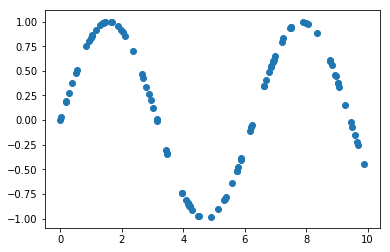

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

rng = np.random.RandomState(1)
N=100
x = 10 * rng.rand(N)
y = np.sin(x)
plt.scatter(x, y)

You can approximate $sin$ with the polynomial.

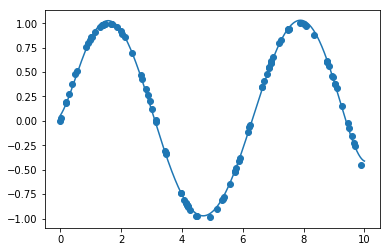

In [0]:
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);



Its coefficients are

In [0]:
coeffs = poly_model[1].coef_
print(coeffs)

[ 0.00000000e+00  4.76502622e-01  9.43383248e-01 -8.31361918e-01
  2.19572167e-01 -2.48601913e-02  1.20814081e-03 -1.86051194e-05]


Taylor expansion
$$
sin(x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\cdots \approx x-0.167\, x^3+0.0083\, x^5+0.000198 \, x^7.
$$

The coefficients do not look alike the coefficients we obtained.

1) Maybe we got not enough points? Explore.


2) Our polynomic expansion contains $x$s with even powers while $sin$ Taylor series has only odd powers of $x$. Maybe we could use Lasso regression to eliminate even powers and fix coefficients in front of the odd powers? Explore.

3) Maybe there is something wrong with the interval $[0,10]$? Maybe its better to choose another interval? 

#Interpolation, regression, approximation



Do you understand a difference between interpolation, regression, approximation? Can you give examples of each?

#Dimension agjustment in Ridge Regression

Here are $100$ points that we perform Ridge regression with polynomial basis function. We want to choose optimal order of polynomial $n$. For that after regression we calculate error fuction for Ridge regression

$$
E=SS(a,b)+E_2=\sqrt{\sum_i{(y_i-y_{\text{prediction}})^2}}+\alpha \sum_i{w_i^2}.
$$

We want to find order of polynomial that minimizes $E$.

If $\alpha=0$ error function would decrease at first and will not depend on $n$ as $n > N$.
If $\alpha \neq 0$ we have minimum for some $\hat{n}$.

Try out different functions that generate points
* sin
* polynomial

Try different alphas
* $\alpha = 0$
* $\alpha\neq 0$

Also try Lasso Regression instead of Ridge Regression.

Note, that minimum is often not sharp.

[0.         9.76485303]
[ 0.00000000e+00 -2.66453526e-15  1.00000000e+00]
[ 0.00000000e+00 -1.06442632e-14  1.00000000e+00 -2.08166817e-16]
[ 0.00000000e+00  2.61041189e-14  1.00000000e+00 -5.68468883e-15
  5.93275429e-16]
[ 0.00000000e+00  7.06136538e-14  1.00000000e+00  3.89459481e-15
 -5.34945352e-16  2.99239800e-17]
[ 0.00000000e+00 -3.83464270e-13  1.00000000e+00 -1.15690167e-13
  1.58239176e-14 -7.40992893e-16 -5.93600689e-18]
[ 0.00000000e+00 -2.98288408e-12  1.00000000e+00 -1.02462403e-12
  2.45331794e-13 -3.08658478e-14  1.82572637e-15 -3.96394479e-17]
[ 0.00000000e+00  8.80972098e-11  1.00000000e+00  7.18445983e-12
 -4.14452904e-13  4.08245444e-14 -1.65220553e-14  2.17297597e-15
 -9.44657730e-17]
[ 0.00000000e+00  1.79611802e-10  1.00000000e+00  1.86314336e-10
 -1.04728606e-10  3.10110388e-11 -5.29341330e-12  5.25134824e-13
 -2.79272601e-14  6.05330243e-16]
[ 0.00000000e+00 -4.66538056e-09  1.00000001e+00 -2.75860425e-09
  5.37546850e-10 -4.47958024e-11  6.64017148e-13  6.839

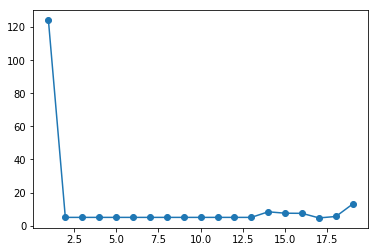

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def ss(y,y_pred):
  sum = 0.0
  for i in range(1,len(y)):
    sum+=(y[i]-y_pred[i])**2 
  return np.sqrt(sum)

rng = np.random.RandomState(1)
N = 100
alpha = 5
x = 10 * rng.rand(N)
y = x**2

def losses(x,y):
  loss = []
  coeffs = []
  n = range(1,20)
  for order in n:
    poly_model = make_pipeline(PolynomialFeatures(order), LinearRegression())
    poly_model.fit(x[:, np.newaxis], y)
    yfit = poly_model.predict(x[:, np.newaxis])
    sum_squares = ss(y, yfit)
    b = poly_model[1].coef_
    print(b)
    coeffs.append(b)
    temp = 0.0
    for j in range(0,len(b)):
      temp += np.abs(b[j]);
    loss.append(sum_squares + alpha * temp)
  return [n, loss, coeffs]

(x_out, y_out, coeffs) = losses(x, y)
plt.plot(x_out, y_out,'-o')
print(y_out)



#Test area

In [0]:
from sklearn.linear_model import LinearRegression

def fit_model(X, Y):
  model = LinearRegression(fit_intercept=True)
  model.fit(X, Y)
  return model

In [25]:
#@title Visualization code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_model(model, X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-30)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  
  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, 1]
  ylim = [-1, 1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  
  # fit the estimator
  xfit = np.linspace(-1.0, 1.0, 10)
  yfit = model.predict(xfit[:, np.newaxis])
  ax.plot(xfit, yfit, c='r');

  plt.close(fig)
  return fig

def visualize_diffs(model, X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-30)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))

  x = X[:, 0]
  y = model.predict(x[:, np.newaxis]) - X[:, 1]
  ax.scatter(x, y, c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, 1]
  ylim = [-1, 1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.set_aspect(0.5)

  for x_, y_ in zip(x, y):
    ax.plot([x_, x_], [0, y_], c='g')
  ax.axhline(0.0, c='r')

  plt.close(fig)
  return fig


import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 3))
  X = data[:, :2] / 300.0 - 1.0
  X[:, 1] *= -1.0
  model = fit_model(X[np.newaxis, :, 0].T, X[:, 1])
  img = figure_to_base64(visualize_model(model, X))
  img_d = figure_to_base64(visualize_diffs(model, X))

  return IPython.display.JSON({'image': img, 'diffs':img_d})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var class_btn = [[650, 50], [650, 150], [650, 250], [650, 350], [650, 450]];
    var class_name = ["Feature"];
    var class_color = ["rgba(210, 0, 0, 0.75)", "rgba(0, 0, 150, 0.75)", 
         "rgba(107, 142, 35, 0.95)", "rgba(150, 0, 150, 0.75)", "rgba(220, 105, 0, 0.75)"]

    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();
    var diff_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = class_color[cls];
      ctx.fill();
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        ctx.drawImage(diff_image, 0, 600, 600, 300);
        ctx.strokeRect(0, 600, 600, 300);

        
        for (var i = 0; i < class_name.length; i++) {
          ctx.font = '20px serif';
          ctx.fillStyle = 'black';
          ctx.fillText(class_name[i], 675,  55 + 100*i);
          circ(ctx, class_btn[i], i);
          ctx.strokeRect(625, 25 + 100*i, 150, 50);
        }

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });

      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }
    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      for (var i = 0; i < class_name.length; i++) { 
        if (is_close([x,y], class_btn[i])) { 
          active_pt = [x, y, i]
        }
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx > -1) {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
    }
    
    function mmove_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
      diff_image.src = 'data:image/  png;base64,' + params.diffs;
    }

  </script>
  <canvas id="canvas" width="800" height="900" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:150px; left:625px;">
    <button type="button" onclick="calculate();">
      Do linear regression
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s
  
display(IPython.display.HTML(generate_html()))
output.register_callback('notebook.InvSVM', invoke)

In [0]:
# rotation testing

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

def visualize_model(model, X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.axhline(y=0, color='black')
  ax.axvline(x=0, color='black')
  ax.tick_params(axis="y",direction="in", pad=-30)
  ax.tick_params(axis="x",direction="in", pad=-15)
  
  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1/0.6, 1/0.6]
  ylim = [-1/0.6, 1/0.6]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  
  # fit the estimator
  xfit = np.linspace(-1.0/0.6, 1.0/0.6, 10)
  yfit = model.predict(xfit[:, np.newaxis])
  ax.plot(xfit, yfit, c='r');

  plt.close(fig)
  return fig

def plot_histo(X, a):
  R = np.array([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]])
  data = [R.dot(x)[1] for x in X]
  fig = plt.figure(figsize=(5,3))
  ax = fig.gca()
  ax.hist(data, density=True, orientation="horizontal")
  ax.axis('tight')
  xlim = [0, 3]
  ylim = [-1, 1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.set_xticks([])
  ax.set_yticks([])
  #ax.tick_params(axis="y",direction="in", pad=-30)
  #ax.tick_params(axis="x",direction="in", pad=-15)
  plt.close(fig)
  return fig


import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 3))
  #X = data[:, :2] / 300.0 - 1.0
  #X[:, 1] *= -1.0
  #y = data[:, 2]
  rng = np.random.RandomState(1)
  x = 1 * rng.rand(50) - 0.5
  y = 1.5 * x - 0.1 + 0.1 * rng.randn(50)
  model = LinearRegression(fit_intercept=True)
  model.fit(x[:, np.newaxis], y)

  #model = fit_model(X[np.newaxis, :, 0].T, X[:, 1])
  main_image = figure_to_base64(visualize_model(model, np.array([x,y]).T))
  images = [figure_to_base64(plot_histo(np.array([x,y]).T, -a)) for a in np.linspace(0.0, np.pi, num=10)]

  return IPython.display.JSON({'image': main_image, 'histos':images})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var class_btn = [[650, 50], [650, 150], [650, 250], [650, 350], [650, 450]];
    var class_name = []; //"class A", "class B", "class C", "class D", "class E"];
    var class_color = ["rgba(210, 0, 0, 0.75)", "rgba(0, 0, 150, 0.75)", 
         "rgba(107, 142, 35, 0.95)", "rgba(150, 0, 150, 0.75)", "rgba(220, 105, 0, 0.75)"]

    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();
    var hist_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = class_color[cls];
      ctx.fill();
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.translate(300, 300)
        ctx.rotate(angle);
        ctx.drawImage(bg_image, -500, -500, 1000, 1000);
        ctx.rotate(-angle);
        ctx.translate(-300, -300)
        ctx.strokeRect(0, 0, 600, 600); // field
        ctx.drawImage(hist_image, 600, 0, 200, 600);

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });

      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }
    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx > -1) {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
    }
    
    function mmove_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    var cur_depth = 0;
    var angle = 0.0;

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
      hist_image.src = 'data:image/  png;base64,' + params.histos[cur_depth];
    }

  function h_change(x) {
    el = document.getElementById("slider_val");
    cur_depth = x - 1;
    el.innerHTML = x;
    angle = Math.PI / 10 * (x-1);
    hist_image.src = 'data:image/  png;base64,' + params.histos[cur_depth];
  }

  </script>
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:500px; left:625px;">
    <button type="button" onclick="calculate();">
      Invoke Decision Tree
    </button>
    <br><br>Tree Depth:<br>
    <input type="range" min="1" max="9" oninput="h_change(this.value)">
    <br><div id="slider_val"></div>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s
  
display(IPython.display.HTML(generate_html()))
    
    
output.register_callback('notebook.InvSVM', invoke)

Explore gradient descent with the following code.
You should understand how it works and its weaknesses.
If you run out of ideas, use the following parameters

function_name | x_ini | y_ini | max_iter | theta | comment
---|---|---|---|---|---
```x**2 + y**2``` | -5.0 | -4.0 | 20 | 0.1 | good convex function
```sin(x) + sin(y)``` | 1.0 | 1.0 | 10 | 0.01 | many global minima
```(1-x**2)+100*(y-x**2)**2``` | -1.0 | -1.0 | 10 | 0.01 | famous Rosenbrock function

In [0]:
#@title # Exploring simple gradient descent

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

#@markdown ---
#@markdown ##Gradient descent options
#@markdown These variables correspond to the parameters of the minimizator
x_ini = 0 #@param {type:"slider", min:-10.0, max:10.0, step:0.1}

y_ini = 0 #@param {type:"slider", min:-10.0, max:10.0, step:0.1}

max_iter = 50 #@param {type:"slider", min:2, max:50, step:1}

theta = 0.735 #@param {type:"slider", min:0, max:1, step:0.001}
#@markdown ---
#@markdown ##Function to minimize
#@markdown Write function using sympy syntax.
#@markdown You can use all elementary functions, (inverse)trigonometric, (inverse)hyperbolic functions, etc.
#@markdown for more details visit http://www.cfm.brown.edu/people/dobrush/am33/SymPy/function.html

function_name = '(1-x**2)+100*(y-x**2)**2' #@param {type:"string"}

from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
transformations = (standard_transformations + (implicit_multiplication_application,))
f = parse_expr(function_name, transformations=transformations)

x_min = -1.2
x_max = 1.2
y_min = -1.2
y_max = 1.2

# function calculated for 3d plot
x_ = np.linspace(x_min, x_max, num=50)
y_ = np.linspace(y_min, y_max, num=50)
z_ = np.array([[f.evalf(subs={'x':x__, 'y':y__}) for x__ in x_] for y__ in y_], dtype=float)

from sympy import diff
Gx = diff(f, 'x')
Gy = diff(f, 'y')

trace = [[x_ini, y_ini, f.evalf(subs={'x':x_ini, 'y':y_ini})]]
for i in range(max_iter):
  g_x = Gx.evalf(subs={'x':trace[-1][0], 'y':trace[-1][1]})
  g_y = Gy.evalf(subs={'x':trace[-1][0], 'y':trace[-1][1]})
  x_new = trace[-1][0] - theta * g_x
  y_new = trace[-1][1] - theta * g_y
  z_new = f.evalf(subs={'x':x_new, 'y':y_new})
  trace.append([x_new, y_new, z_new])
trace = np.array(trace, dtype=float)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]])

fig.add_trace(go.Scatter3d(x=trace[:, 0], y=trace[:, 1], z=trace[:, 2], 
                           marker=dict(size=4, colorscale='Viridis'),
                           line=dict(color='red', width=2)),
              row=1, col=1)

fig.add_trace(go.Surface(x=x_, y=y_, z=z_, opacity=0.9, showscale=False),
              row=1, col=1)

fig.add_trace(go.Contour(z=z_, x=x_, y=y_, contours=dict(showlabels=True)),
              row=1, col=2)

fig.add_trace(go.Scatter(x=trace[:, 0], y=trace[:, 1], line=dict(color='red', width=2)),
              row=1, col=2)

fig.update_layout(width=1200, height=600, autosize=False, 
                  title_text="Gradient descent demonstration",
                  scene=dict(aspectratio = dict(x=1, y=1, z=1)),
                  showlegend=False)
fig.show()